In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.debugger import Pdb

scipy numpy 矩阵 列向量问题

In [2]:
# %xmode Plain
# %pdb on
# %run -d

In [3]:
data = pd.read_csv("ex2data1.txt",header=None,names=["s1","s2","y"])
data.head()

,s1,s2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


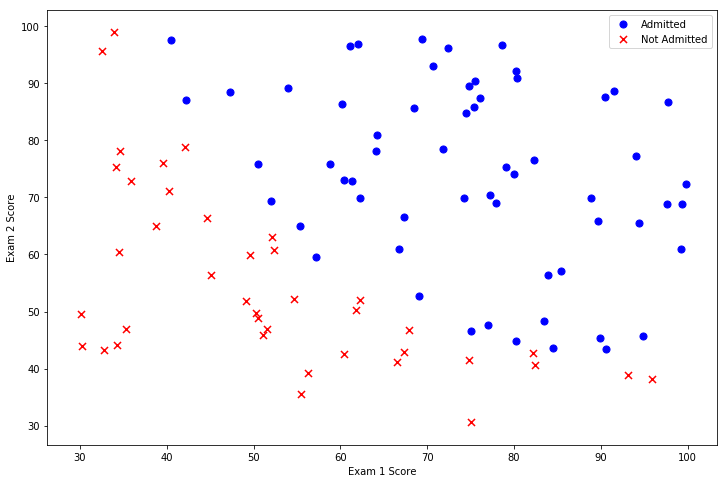

In [4]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['s1'],positive['s2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['s1'],negative['s2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel("Exam 1 Score")
ax.set_ylabel("Exam 2 Score")
plt.show()

In [5]:
#定义数据
x = data.values[:,0:2]
y = data.values[:,2:3]
m = x.shape[0]
n = x.shape[1]
x = np.column_stack((np.ones(m),x))
theta = np.zeros((n+1,1))
cval = []
print(x.shape)
print(y.shape)
print(theta.shape)

(100, 3)
(100, 1)
(3, 1)


In [6]:
def sigmiod(z):
    return 1 / (1 + np.exp(-z))

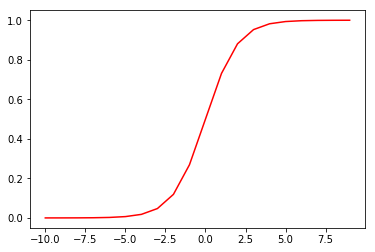

In [7]:
nums = np.arange(-10, 10, step=1)

fig,ax = plt.subplots()
ax.plot(nums,sigmiod(nums),'r')
plt.show()

In [8]:
# x(m,n+1) 
# theta(n+1,1)
# x @ theta reutrn (m,1)
def h_function(theta):
    return sigmiod(np.dot(x,theta))

In [9]:
# x(m,n+1)
# y(m,1)
# cost(m,1)
# jval 一个值
# import pdb
# pdb.set_trace()
def cost_function(theta,x,y):
#     cost = np.dot(-y.T,np.log(h_function(theta))) - np.dot(1 - y.T,np.log(1 - h_function(theta)))
#     Pdb.set_trace(self)
    testv = x @ theta
    print(testv)
    cost = -y * np.log(h_function(theta)) - (1 - y) * np.log(1 - (h_function(theta))) #错误在于hf =1
    jval = np.sum(cost) / m  # 等于np.mean(cost)
    cval.append(jval)
    return jval

In [10]:
cost_function(theta,x,y)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


0.6931471805599453

In [11]:
# x(m,n+1) 
# y(m,1)
# theta(n+1,1)
# delta(m,1)
# t_theta(n+1,1)
def gradient(theta,x,y):
    cost_function(theta,x,y)
    delta = h_function(theta) - y
    t_theta =  0.1 / m * np.dot(x.T,delta)
    theta  = theta - t_theta
    return theta
#     return (1 / len(x)) * x.T @ (h_function(theta) - y)

In [12]:
print(gradient(theta,x,y))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.01      ]
 [1.20092166]
 [1.12628422]]


In [13]:
def run(step):
    init_theta = np.zeros((n+1,1))
    learn_rate = 0.01
    for i in range(step):
        init_theta = gradient(init_theta,x,y)
    return init_theta

In [14]:
step = 10
now_theta = run(step)
print(now_theta)
print(cost_function(now_theta,x,y))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[129.46828309]
 [ 85.82021001]
 [125.16852489]
 [169.49254742]
 [179.78130678]
 [117.57972527]
 [182.09361302]
 [142.54189276]
 [189.8590894 ]
 [150.43817617]
 [158.18474525]
 [124.56349955]
 [184.9947515 ]
 [193.37045781]
 [133.13150808]
 [165.2978363 ]
 [142.35859083]
 [134.18219185]
 [189.53130635]
 [146.03954579]
 [129.1667842 ]
 [181.81356987]
 [115.72385139]
 [ 90.88849948]
 [171.27320989]

D:\coding\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
D:\coding\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


[0.6931471805599453, 0.6931471805599453, 0.6931471805599453, nan, 86.4573031553539, nan, nan, 69.09210554715412, nan, nan, 51.72690793895438, nan, nan]


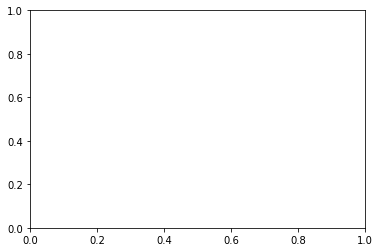

In [15]:
p_x = np.arange(step)
fig, ax = plt.subplots()

# ax.errorbar(p_x, cval)
# plt.show()
print(cval)


jupyter调试   nan值好像是除以0了  cost函数出现问题  
测试发现是gradient函数  theta 有问题   经常为1